#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 4, 2016

## Next Steps of Our Project

Goals:
* Explore more aspects of our data
* Create clearer visualizations

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

We want to explore more features of our data to learn more about the axes of diversity we were initially interested in.  

We also want to modify the presentation of our visualizations from the previous notebook to make them clearer and more impactful.

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [6]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [8]:
df_subset = df[df['ALCLSACT'] < 3]
print df_subset['ALCLSACT']
 

1        2
3        2
4        2
5        2
8        2
9        2
10       2
11       2
13       2
17       2
22       2
26       2
29       2
32       2
35       2
38       2
40       2
41       2
42       2
44       2
46       2
50       2
52       2
53       2
56       2
61       2
63       1
64       1
66       2
67       2
        ..
55217    2
55219    2
55220    2
55221    2
55222    2
55223    2
55224    2
55226    2
55227    2
55228    2
55229    2
55231    2
55234    2
55237    2
55238    2
55239    2
55241    2
55242    2
55244    2
55245    2
55250    2
55251    2
55252    2
55254    2
55255    2
55260    1
55261    2
55262    2
55265    2
55266    2
Name: ALCLSACT, dtype: int64


In [37]:
def mental_health_bars_activity(df, act, emotion, substancestr, emotionstr):
    """
    let's use relative frequencies and bin up the data based on the design decision described above.
    
    df: dataframe of interest

    s30: subtance of interest
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
   
    df_subset = df[df[act] < 3]
    
    # 
    df_subset= df_subset[df_subset[emotion] < 6]
    df_subset['BRACKET'] = df_subset[act]
    df_subset['EMOBRACKET'] = df_subset[emotion]
    
    df_subset.loc[df_subset[emotion] >= 5, 'EMOBRACKET'] = emotionstr +' Never'     
    df_subset.loc[df_subset[emotion] < 5, 'EMOBRACKET'] = emotionstr + ' Some or Little'
    df_subset.loc[df_subset[emotion] < 3, 'EMOBRACKET'] = emotionstr + ' Most or All'

    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped['EMOBRACKET'].value_counts(normalize=True)
    display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, 'EMOBRACKET': em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    display(plotting_df)
    
    p, ax = plt.subplots()
    #_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    hue_order_list = [emotionstr + ' Most or All' , emotionstr + ' Some or Little', emotionstr + ' Never']
    p = sns.barplot(x="BRACKET", y="percentage", hue="EMOBRACKET", hue_order=hue_order_list, data=plotting_df)
    ax.set_xticklabels(['yes', 'no'])
    xlabel = 'Gave up or spent less time on important activities'
    plt.xlabel(xlabel)
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    title =  'Sacrificed Important Activities due to ' + substancestr
    plt.title(title)
    plt.show()
    
    return


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.485670
         Hopelessness Never             0.379551
         Hopelessness Most or All       0.134779
2        Hopelessness Never             0.663388
         Hopelessness Some or Little    0.294421
         Hopelessness Most or All       0.042191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,13.477924
1,2,Hopelessness Most or All,4.219133
2,1,Hopelessness Never,37.955074
3,2,Hopelessness Some or Little,29.442113
4,1,Hopelessness Some or Little,48.567002
5,2,Hopelessness Never,66.338755


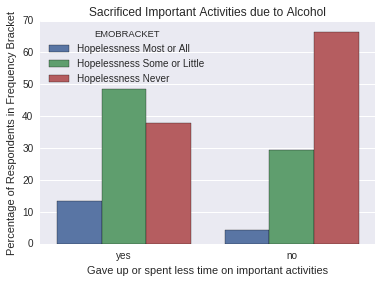

In [38]:
mental_health_bars_activity(df, 'ALCLSACT', 'DSTHOP30', 'Alcohol', 'Hopelessness')